# **Linear Regression**

Linear regression is the simplest approach for statistical learning. It is a good starting point for more advanced approaches, and in fact, many fancy statistical learning techniques can be seen as an extension of linear regression. It is a type of supervised machine learning. It is used to predict the relationship between  dependent variable and given independent variables. 

* Linear regression analysis is used to predict the value of a variable based on the value of another variable. 
* The variable you want to predict is called the dependent variable. 
* The variable you are using to predict the other variable's value is called the independent variable.




In [8]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **INFORMATION ABOUT DATASET**
The dataset that I have considered is Salary Data which has one feature ie Year of experience and one label ie Salary
* In the dataset Year Of Experience is independent variable
* In the dataset Salary is dependent variable


### **Import Dataset**

In [9]:
df=pd.read_csv('/content/salaryData.csv')

# **Exploratory Data Analysis (EDA)** 

In [10]:
# printing first five rows
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
# printing last five rows
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [12]:
# printing the max value from the dataset
df.max()

YearsExperience        10.5
Salary             122391.0
dtype: float64

In [13]:
# printing the min value from the dataset
df.min()

YearsExperience        1.1
Salary             37731.0
dtype: float64

In [14]:
# finding the rows and cols of the data
df.shape

(30, 2)

In [15]:
# checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
# Finding the correlation between features
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [17]:
# info() provides brief information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [18]:
# describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [19]:
# Dropping duplicate value if there exist any
if df.duplicated().sum()>0:
  df.drop_duplicates(keep="first", inplace=True)
df.shape            # since the no. of rows and cols are same it implies there were no duplicate values

(30, 2)

# **Data Visualization**

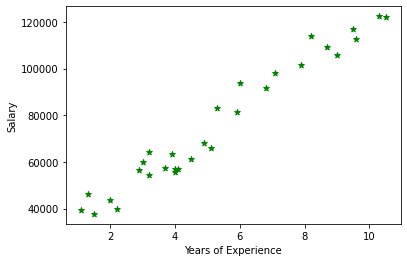

In [20]:
x=df['YearsExperience'] 
y=df['Salary']
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x,y,color='green',marker='*')
plt.show()

# **Splitting of dataset for training & testing**




In [21]:
# using slicing
# for x(features): taking all rows and only first column
# for y(labels): taking all rows and only last column
x=df.iloc[:,:-1].values   #x features
y=df.iloc[:,1].values     #y labels
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


### **The train-test split is a technique for evaluating the performance of a machine learning algorithm**
* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.


In [22]:
# Training size: 70%
# Testing size: 30%
import sklearn 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=1)

### **Creating Simple Linear Model**

In [23]:
# imported linear regression model from sklearn 
from sklearn.linear_model import LinearRegression
model = LinearRegression()   # y=ax+b

# fit training data into newly created model
mymodel=model.fit(xtrain,ytrain)


### **Prediction**

In [24]:
# using predict() and adding testing data
y_pred=mymodel.predict(xtest)

In [25]:
#difference of y_pred is predicted by model and ytest  is actual
print('Predicted values: ')
print(y_pred)
print()

print('Actual values: ')
print(ytest)

Predicted values: 
[ 74675.37776747  91160.02832519  61853.98288925  81086.07520659
  67348.86640849  88412.58656557 113139.56240215  44453.51841166
 105813.05104316  98486.53968418]

Actual values: 
[ 83088.  98273.  63218.  93940.  61111.  91738. 116969.  43525. 109431.
 101302.]


In [26]:
# created dataframe for representing of both test and predicted value
model_dataset=pd.DataFrame(ytest, y_pred)
model_dataset

,0
74675.377767,83088.0
91160.028325,98273.0
61853.982889,63218.0
81086.075207,93940.0
67348.866408,61111.0
88412.586566,91738.0
113139.562402,116969.0
44453.518412,43525.0
105813.051043,109431.0
98486.539684,101302.0


In [27]:
# printing coef and intercept of the linear regression model
print("Coeff:",  mymodel.coef_)
print("Intercept:" ,mymodel.intercept_)

Coeff: [9158.13919873]
Intercept: 26137.24001419694


### **Using Mathematical Knowledge**

In [28]:
# y = ax+b

# where y = Target

#           x = features

#           a = slope

#           b = y-intercept constant


ymath=(9158.139*6 )+26137.24001419694
ymath

81086.07401419693

In [30]:
ypred=mymodel.predict([[6]])
ypred

array([81086.07520659])

The value predicted by model and mathematically are both same

### **Estimation of accuracy and mean square error**

In [31]:
from sklearn.metrics import r2_score,mean_squared_error

print("accuracy is: ", r2_score(ytest,y_pred))

print("mean square error is: " ,mean_squared_error(ytest,y_pred))

accuracy is:  0.9240850478446321
mean square error is:  37496296.61879842


### **Visualization of predicted and actual values from the Linear Regression model**

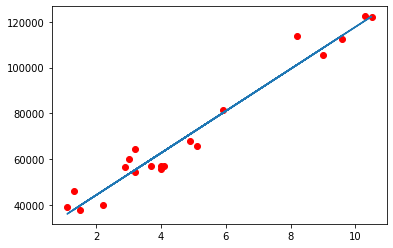

In [22]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,mymodel.predict(xtrain))
plt.show()

In the above plot data points are the actual values 
and the straight line passing through is the predicted values 